# U.S. Geological Survey Class GW3099
Advanced Modeling of Groundwater Flow (GW3099)\
Boise, Idaho\
September 16 - 20, 2024

![title](../../images/ClassLocation.jpg)

# GWT Example 1 -- One dimensional transport in steady flow field

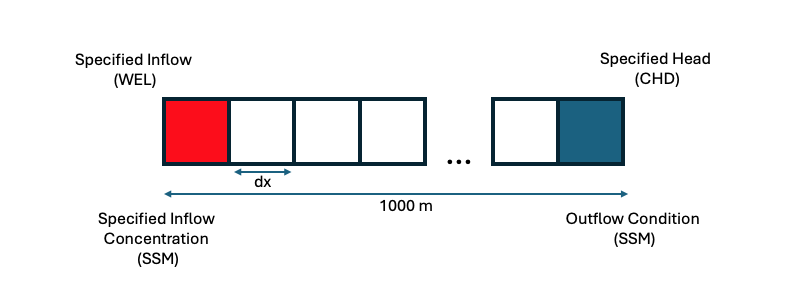

This example demonstrates the behavior of the GWT Model for several different advection schemes, cell sizes, and time steps.  The example is based on the figure shown above.  A 1000-m section is discretized into 1 layer, 1 row, and a variable number of columns.  Water is injected into the first cell using the Well Package.  The cell in the last column is assigned as a constant head using the Constant-Head (CHD) Package.  

For the GWT Model, the concentration of the water injected into the first cell is specified at a value of 1.0 using auxiliary variables and the GWT Source and Sink Mixing (SSM) Package.  For the last cell in the model, solute leaves the model at the simulated concentration in the cell.  This outflow condition happens by default, and requires that the Source and Sink Mixing (SSM) Package is active for the GWT Model.

The problem is designed so that the solute front reaches a distance of 500 m after 2000 days of injection.  There is no specified dispersion, so any observed mixing in the model is due to numerical dispersion.  The analytical solution for this problem is straightforward and can be calculated from the fluid velocity.  

Combating the effects of numerical dispersion is one of the largest challenges with solute transport modeling.  This notebook is intended to highlight several of the factors that affect numerical dispersion.

The goal of this example is to evaluate the behavior of the GWT Model for the following:
* advection scheme (central, upstream, TVD)
* temporal resolution
* spatial resolution

In [ ]:
# imports
%matplotlib inline
import ex1
import flopy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# variables specified for the notebook
figsize = (6, 4)

# problem length and time variables
length_x = 1000.0  # meters
simulation_time = 2000.0  # days
velocity = length_x / 2.0 / simulation_time
print(f"{velocity=} m/day")

# analytical solution
xa = np.linspace(0, length_x, 1000)
ta = np.linspace(0, simulation_time, 1000)
analytical_x = ex1.block_wave_constant(xa, simulation_time, velocity)
analytical_t = ex1.block_wave_constant(length_x / 4.0, ta, velocity)

## Base Case

In the corresponding python script `ex1.py` the `get_sim` function will return a flopy simulation object for this example.  We will use this function to the create the simulations in this notebook.

In [ ]:
# Run the base example
sim = ex1.get_ex1_sim("ex1", dx=10.0, dt=20.0, advscheme="tvd")
sim.write_simulation(silent=True)
sim.run_simulation(silent=True)
cobj = sim.gwt[0].output.concentration()
concentrations = cobj.get_alldata()

with flopy.plot.styles.USGSPlot() as fs:
    fig, axes = plt.subplots(2, 1, figsize=figsize, tight_layout=True)
    x = sim.gwt[0].modelgrid.xcellcenters.flatten()
    t = np.array(cobj.times)

    # Concentration versus distance
    ax = axes[0]
    ax.plot(
        xa,
        analytical_x,
        "k-",
        label="analytical",
    )
    ax.plot(
        x,
        concentrations[-1, 0, 0, :],
        label="MODFLOW",
    )
    ax.set_xlabel("Distance, in meters")
    ax.set_ylabel("Concentration")
    ax.legend()

    # Concentration versus time
    ntimes, nlay, nrow, ncol = concentrations.shape
    ax = axes[1]
    ax.plot(
        ta,
        analytical_t,
        "k-",
        label="analytical",
    )
    ax.plot(
        t,
        concentrations[:, 0, 0, int(ncol / 4)],
        label="MODFLOW",
    )
    ax.legend()
    ax.set_xlabel("Time, in days")
    ax.set_ylabel("Concentration")

## Exercise A -- Advection Schemes

Run the model for the three different advection schemes supported by the Advection (ADV) Package.  These schemes include central in space ("central"), upstream weighted ("upstream"), and total-variation diminishing ("tvd").  Make plots of concentration versus distance for the end of the time step (t = 2000 days) and concentration versus time for a cell located at x = 250 m.  It may be helpful to create a function like the following, which can also be used for the subsequent exercises.

```
def run_model(dx=10.0, dt=20.0, advscheme="tvd"):
    sim = ex1.get_ex1_sim("ex1", dx=dx, dt=dt, advscheme=advscheme)
    sim.write_simulation(silent=True)
    sim.run_simulation(silent=True)
    cobj = sim.gwt[0].output.concentration()
    concentrations = cobj.get_alldata()
    x = sim.gwt[0].modelgrid.xcellcenters.flatten()
    t = np.array(cobj.times)
    return x, t, concentrations
```

In [ ]:
# Create concentration/distance and concentration/time plots
# for the three advection schemes (upstream, central, and tvd)



## Exercise B -- Spatial discretization

Evaluate the effect of cell size on transport behavior.  Use cell sizes of dx = 1, 10, and 20.  Make plots of concentration versus distance and concentration versus time as done for the previous example.

In [ ]:
# Evaluate the effect of cell size.  Run the model with dx = 1, 10, 20
# and plot the results



## Exercise C -- Temporal discretization

Evaluate the effect of time-step size on transport behavior.  Use time-step sizes of dt = 1, 10, and 20.  Make plots of concentration versus distance and concentration versus time as done for the previous examples.

In [ ]:
# Evaluate the effect of time step size.  Run the model with dt = 1, 10, 20
# and plot the results



## Exercise D -- Best Case

Run a simulation using the best values for advscheme, dx, and dt that you identified above.  Is there still numerical dispersion?  Would you be comfortable using a model for a project knowing there is numerical dispersion?

In [ ]:
# Run the model with the best values for advscheme, dx, and dt
